<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)


In [2]:
!pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.5/273.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

stock = 'META'
ticker = yf.Ticker(stock)
df = ticker.history(start= '2013-01-01', end= '2023-12-31', interval='1mo')['Close']

df



,Close
Date,
2013-01-01 00:00:00-05:00,30.887001
2013-02-01 00:00:00-05:00,27.168200
2013-03-01 00:00:00-05:00,25.503214
2013-04-01 00:00:00-04:00,27.686640
2013-05-01 00:00:00-04:00,24.276905
...,...
2023-08-01 00:00:00-04:00,295.001801
2023-09-01 00:00:00-04:00,299.308838
2023-10-01 00:00:00-04:00,300.365631


In [5]:
df = df.reset_index()  # Reset the index to make 'Date' a regular column
df["ds"] = pd.to_datetime(df["Date"])  # Convert the 'Date' column to datetime and assign to 'ds'


In [6]:
print(df.dtypes)


Date     datetime64[ns, America/New_York]
Close                             float64
ds       datetime64[ns, America/New_York]
dtype: object


In [7]:

df["unique_id"]="1"
# The DataFrame has 4 columns after adding 'ds' and 'unique_id' in previous steps, modify the column names accordingly
#df.columns=["ds", "y", "unique_id"] # incorrect
# assuming the first column is 'Date' based on previous cell outputs
df.columns = ['Date', 'Close', 'ds', 'unique_id'] # Assuming original columns and new ones
# or if you want to keep only specific columns:
# df = df[['ds', 'Close', 'unique_id']]  # Keep only 'ds', 'Close', and 'unique_id' columns
# df.columns = ["ds", "y", "unique_id"] # then rename them
df.head()

,Date,Close,ds,unique_id
0,2013-01-01 00:00:00-05:00,30.887001,2013-01-01 00:00:00-05:00,1
1,2013-02-01 00:00:00-05:00,27.168200,2013-02-01 00:00:00-05:00,1
2,2013-03-01 00:00:00-05:00,25.503214,2013-03-01 00:00:00-05:00,1
3,2013-04-01 00:00:00-04:00,27.686640,2013-04-01 00:00:00-04:00,1
4,2013-05-01 00:00:00-04:00,24.276905,2013-05-01 00:00:00-04:00,1


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


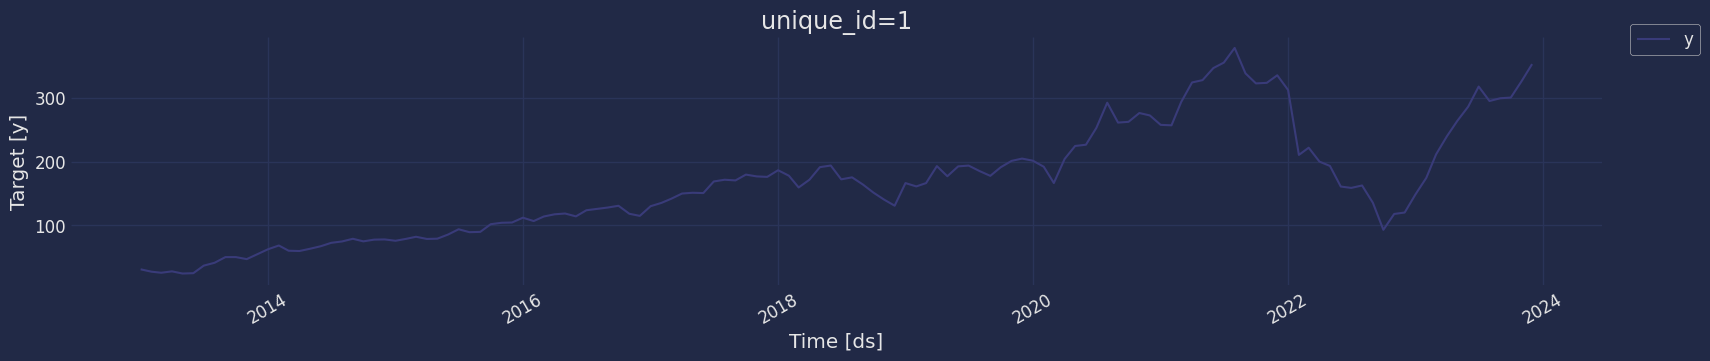

In [8]:
# Change 'Close' to 'y'
df = df.rename(columns={'Close': 'y'})

# Select only the required columns for StatsForecast.plot()
df_plot = df[['ds', 'y', 'unique_id']]

# Now plot using the modified DataFrame:
from statsforecast import StatsForecast
StatsForecast.plot(df_plot)

In [9]:
df.head()

,Date,y,ds,unique_id
0,2013-01-01 00:00:00-05:00,30.887001,2013-01-01 00:00:00-05:00,1
1,2013-02-01 00:00:00-05:00,27.168200,2013-02-01 00:00:00-05:00,1
2,2013-03-01 00:00:00-05:00,25.503214,2013-03-01 00:00:00-05:00,1
3,2013-04-01 00:00:00-04:00,27.686640,2013-04-01 00:00:00-04:00,1
4,2013-05-01 00:00:00-04:00,24.276905,2013-05-01 00:00:00-04:00,1


In [10]:
df["ds"] = pd.to_datetime(df["ds"])


,y
count,132.000000
mean,165.715746
std,88.133885
min,24.276905
25%,93.515936
50%,161.703125
75%,206.074539
max,378.241180


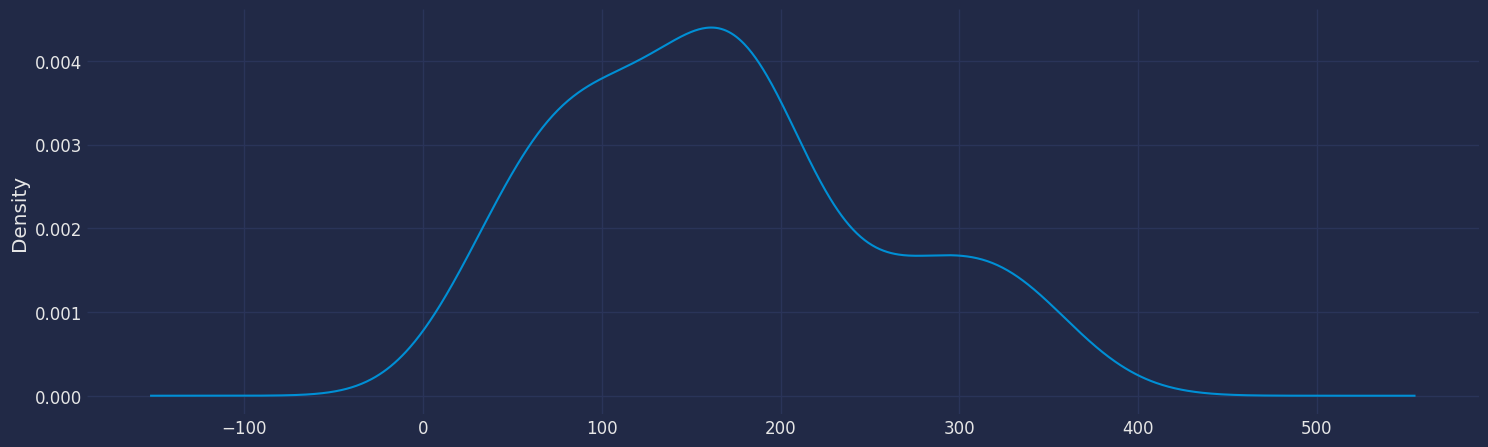

In [11]:
df["y"].plot(kind='kde',figsize = (16,5))
df["y"].describe()


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose


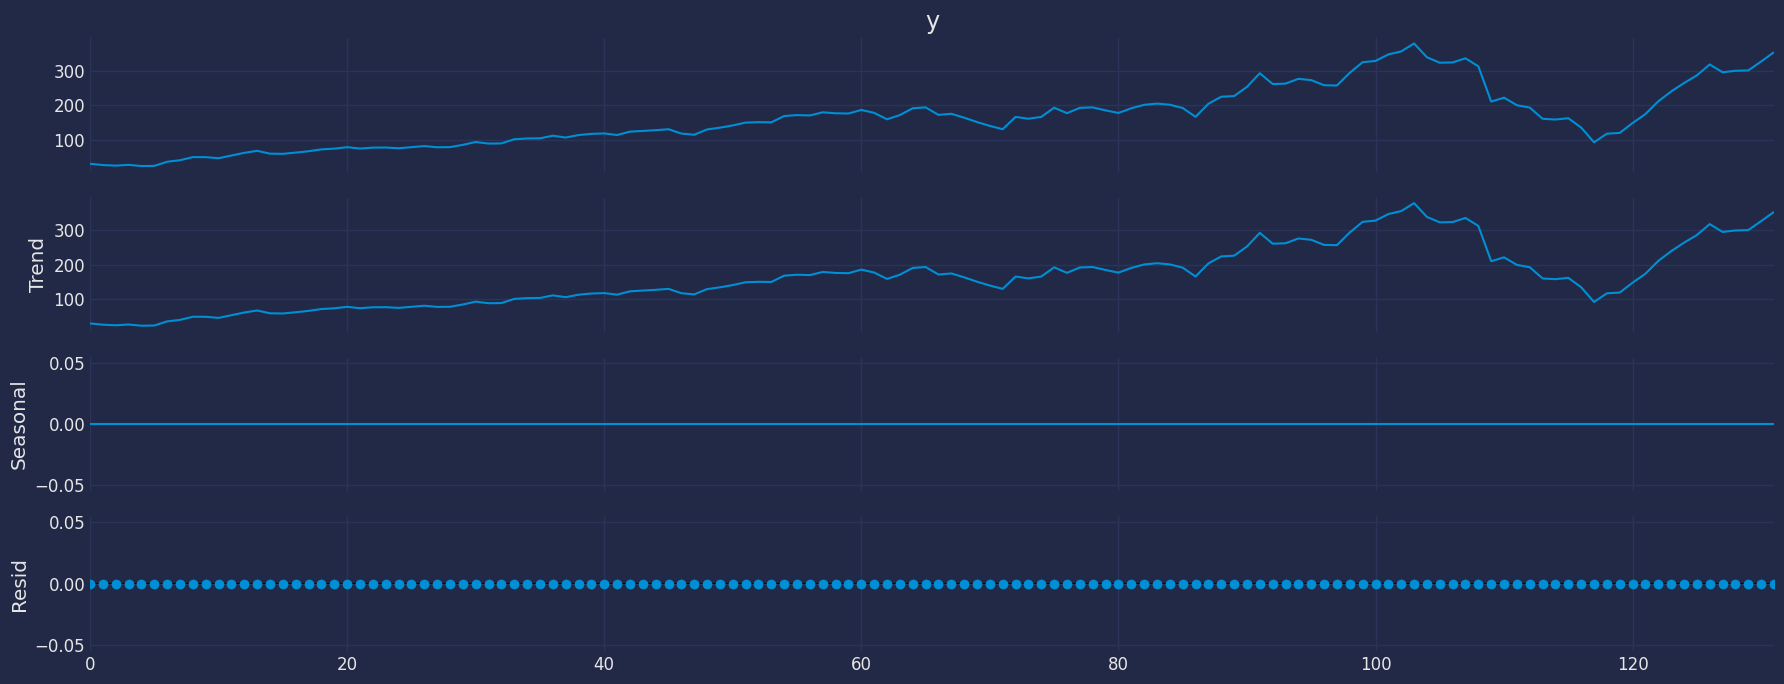

In [13]:
decomposed=seasonal_decompose(df["y"], model = "add", period=1)
decomposed.plot()
plt.show()


In [14]:
from statsmodels.tsa.stattools import adfuller


In [15]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")


In [16]:
Augmented_Dickey_Fuller_Test_func(df["y"],"Life expectancy")


Dickey-Fuller test results for columns: Life expectancy
Test Statistic                  -1.630104
p-value                          0.467436
No Lags Used                     4.000000
Number of observations used    127.000000
Critical Value (1%)             -3.482920
Critical Value (5%)             -2.884580
Critical Value (10%)            -2.579058
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary


In [17]:
df1=df.copy()
df1['y_diff'] = df['y'].diff()
df1.dropna(inplace=True)
df1.head()


,Date,y,ds,unique_id,y_diff
1,2013-02-01 00:00:00-05:00,27.168200,2013-02-01 00:00:00-05:00,1,-3.718801
2,2013-03-01 00:00:00-05:00,25.503214,2013-03-01 00:00:00-05:00,1,-1.664986
3,2013-04-01 00:00:00-04:00,27.686640,2013-04-01 00:00:00-04:00,1,2.183426
4,2013-05-01 00:00:00-04:00,24.276905,2013-05-01 00:00:00-04:00,1,-3.409735
5,2013-06-01 00:00:00-04:00,24.805313,2013-06-01 00:00:00-04:00,1,0.528408


In [18]:
Augmented_Dickey_Fuller_Test_func(df1["y_diff"],"Life expectancy")


Dickey-Fuller test results for columns: Life expectancy
Test Statistic                  -3.789957
p-value                          0.003012
No Lags Used                     3.000000
Number of observations used    127.000000
Critical Value (1%)             -3.482920
Critical Value (5%)             -2.884580
Critical Value (10%)            -2.579058
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


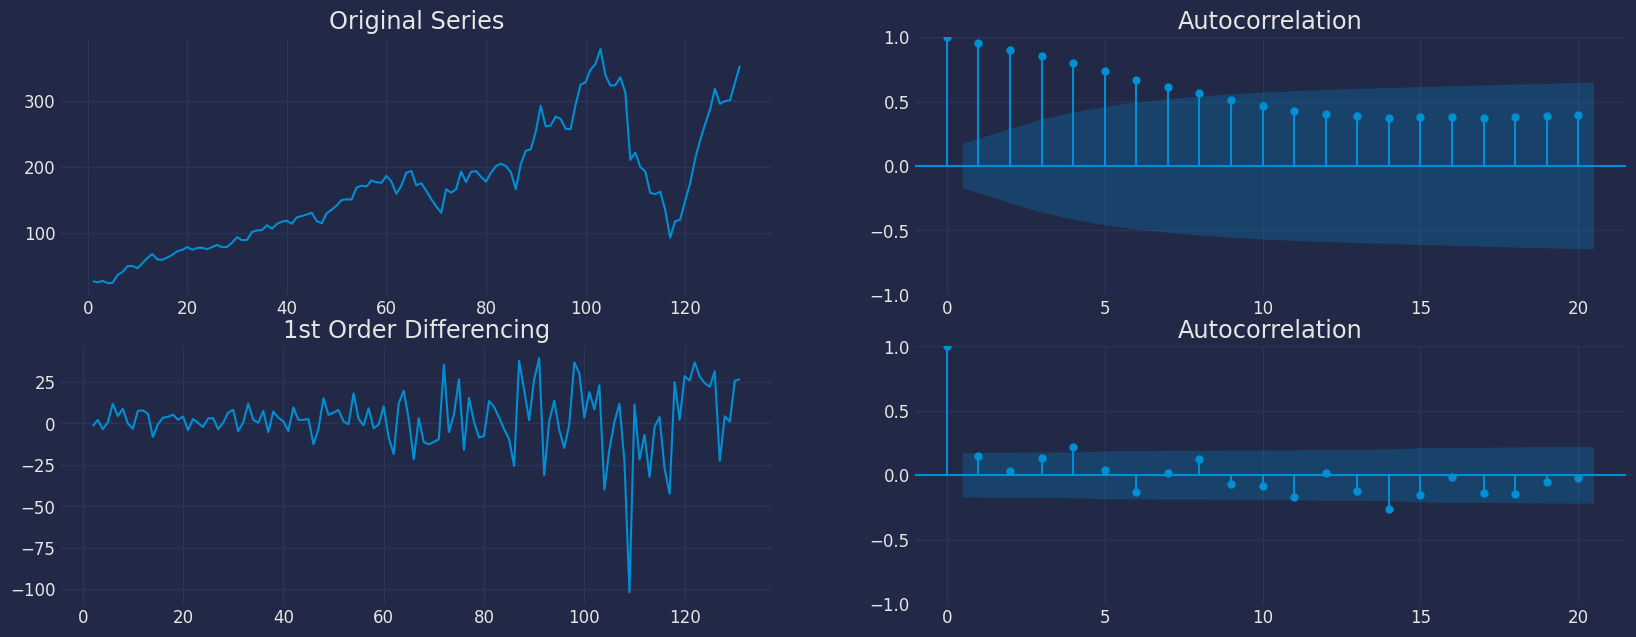

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, )
axes[0, 0].plot(df1["y"]); axes[0, 0].set_title('Original Series')
plot_acf(df1["y"], ax=axes[0, 1],lags=20)

axes[1, 0].plot(df1["y"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1["y"].diff().dropna(), ax=axes[1, 1],lags=20)


plt.show()


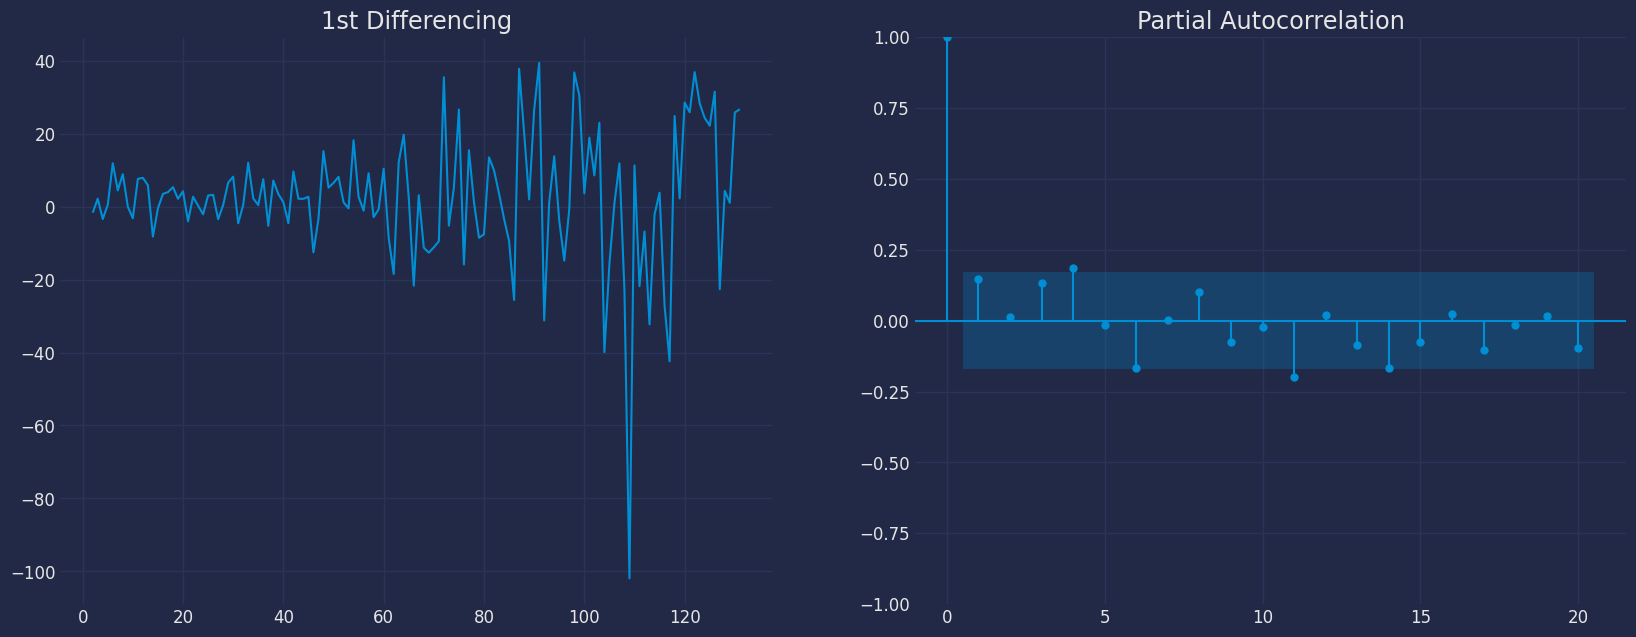

In [20]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df1["y"].diff().dropna(), ax=axes[1],lags=20)

plt.show()


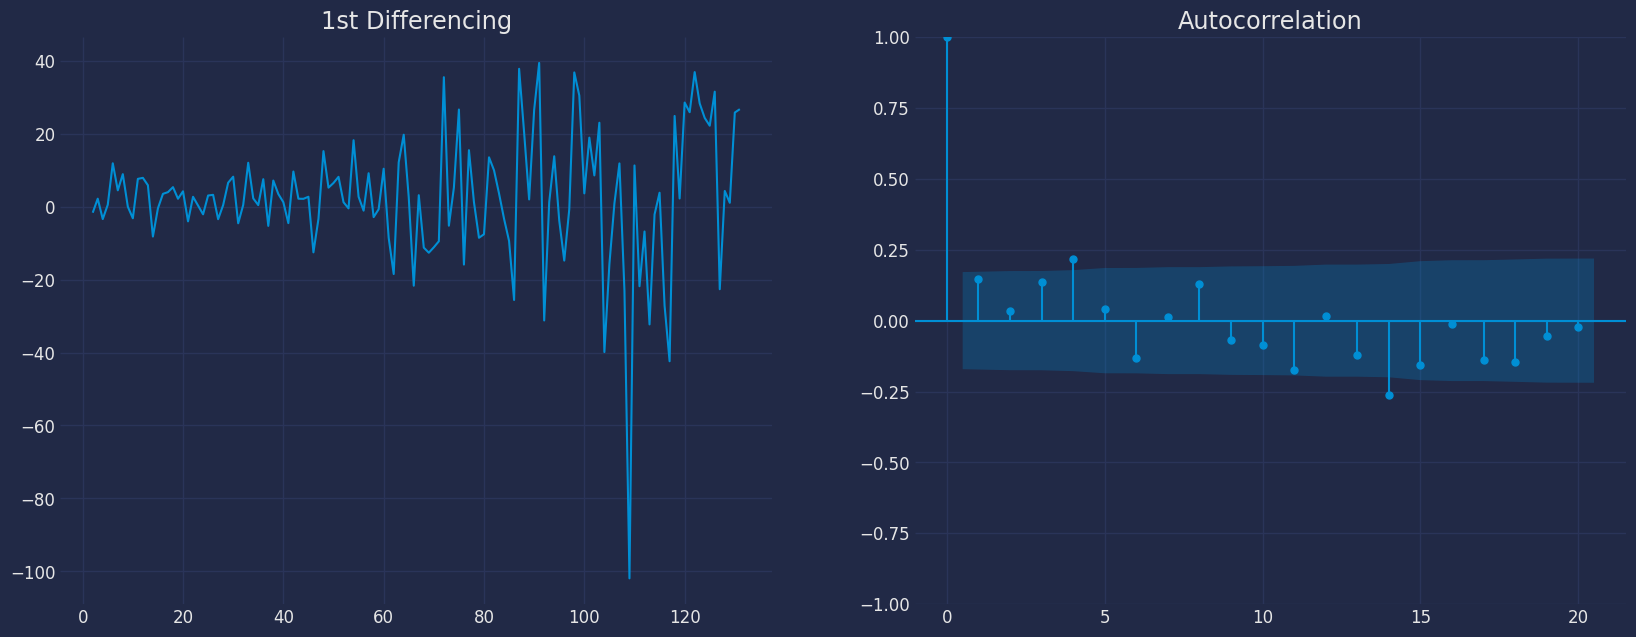

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df["y"].diff().dropna(), ax=axes[1], lags=20)

plt.show()


In [22]:
from statsforecast.models import ARIMA


In [23]:
arima = ARIMA(order=(1, 1, 1), season_length=1)


In [24]:
arima = arima.fit(y=df["y"].values)


In [25]:
y_hat_dict = arima.predict(h=6,)
y_hat_dict


{'mean': array([359.6087964 , 364.81139979, 368.84445778, 371.9708842 ,
        374.39448987, 376.27326891])}

In [26]:
y_hat_dict2 = arima.predict(h=6,level=[95])
y_hat_dict2


{'mean': array([359.6087964 , 364.81139979, 368.84445778, 371.9708842 ,
        374.39448987, 376.27326891]),
 'lo-95': 0    324.977764
 1    312.350717
 2    300.944902
 3    289.969759
 4    279.276161
 5    268.848860
 Name: 95%, dtype: float64,
 'hi-95': 0    394.239829
 1    417.272083
 2    436.744014
 3    453.972009
 4    469.512819
 5    483.697677
 Name: 95%, dtype: float64}

In [27]:
Y_hat_df=arima.forecast(y=df["y"].values, h=6, fitted=True)
Y_hat_df


{'mean': array([359.6087964 , 364.81139979, 368.84445778, 371.9708842 ,
        374.39448987, 376.27326891]),
 'fitted': array([ 30.85611405,  30.80147782,  26.53819555,  24.87645947,
         27.58987602,  23.74262965,  24.54103044,  38.16181294,
         42.72206201,  52.29995027,  51.47180817,  47.32924578,
         55.82957239,  64.32719502,  70.30374687,  60.23528246,
         59.64955662,  63.62508236,  67.96475742,  73.72748134,
         75.71939307,  80.09916392,  75.03442414,  78.01104809,
         78.17667106,  75.64121494,  79.12749742,  82.67139356,
         78.50428085,  78.9913735 ,  86.44192983,  95.45280744,
         89.63135764,  89.99417077, 103.5550628 , 105.44440599,
        105.37059398, 113.56409507, 106.949553  , 114.96784795,
        118.47679666, 119.4189306 , 113.92963988, 124.89116662,
        126.88438109, 128.9089479 , 131.62329479, 116.99085177,
        113.55713009, 131.29648827, 136.72232143, 143.53129087,
        152.14199269, 152.66494528, 151.51849405

In [28]:
forecast=pd.Series(pd.date_range("2014-01-01", freq="ys", periods=6))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast


<ipython-input-28-4cca6af622ef>:1: FutureWarning: 'ys' is deprecated and will be removed in a future version, please use 'YS' instead.
  forecast=pd.Series(pd.date_range("2014-01-01", freq="ys", periods=6))


,ds
0,2014-01-01
1,2015-01-01
2,2016-01-01
3,2017-01-01
4,2018-01-01
5,2019-01-01


In [29]:
df=df.set_index("ds")


In [30]:
forecast["unique_id"]="1"
forecast["hat"]=y_hat_dict.get("mean")
forecast["lo-95"]=y_hat_dict2.get("lo-95")
forecast["hi-95"]=y_hat_dict2.get("hi-95")
forecast=forecast.set_index("ds")
forecast


,unique_id,hat,lo-95,hi-95
ds,,,,
2014-01-01,1,359.608796,324.977764,394.239829
2015-01-01,1,364.811400,312.350717,417.272083
2016-01-01,1,368.844458,300.944902,436.744014
2017-01-01,1,371.970884,289.969759,453.972009
2018-01-01,1,374.394490,279.276161,469.512819
2019-01-01,1,376.273269,268.848860,483.697677


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (Your existing code for creating df and forecast) ...

# Convert the index of 'forecast' to timezone-aware before concatenating
forecast.index = forecast.index.tz_localize(df.index.tz) # Assumes df.index has a timezone

# Concatenate the DataFrames
df_plot = pd.concat([df, forecast])

# ... (Rest of your plotting code) ...

_, ax = plt.subplots(1, 1)
df_plot = pd.concat([df, forecast])
df_plot[['y', 'hat']].plot(ax=ax, linewidth=2)
ax.fill_between(df_plot.index,
                df_plot['lo-95'],
                df_plot['hi-95'],
                alpha=.35,
                color='orange',
                label='ARIMA-level-95')
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=12)
ax.legend(prop={'size': 15})
ax.grid(True)



TypeError: Already tz-aware, use tz_convert to convert.

In [36]:
df.reset_index("ds", inplace=True)
Y_train_df = df[df.ds<='2013-01-01']
Y_test_df = df[df.ds>'2013-01-01']

Y_train_df.shape, Y_test_df.shape


((1, 4), (131, 4))

In [37]:
from sklearn import metrics

def model_evaluation(y_true, y_pred, Model):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print (f'Model Evaluation: {Model}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}')
    print(f'corr is : {np.corrcoef(y_true, y_pred)[0,1]}',end='\n\n')


In [42]:
# ipython-input-30-b3a62f9e8399
forecast = forecast.reindex(Y_test_df.ds, method='ffill') # Forward fill forecast values to match Y_test_df
forecast["unique_id"]="1"
forecast["hat"]=y_hat_dict.get("mean")
forecast["lo-95"]=y_hat_dict2.get("lo-95")
forecast["hi-95"]=y_hat_dict2.get("hi-95")
forecast=forecast.set_index("ds")
forecast

ValueError: Length of values (6) does not match length of index (131)

In [43]:
model_evaluation(Y_test_df["y"], forecast["hat"], "Arima")


Model Evaluation: Arima


ValueError: Input contains NaN.